In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

In [2]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Visualizing pairwise relationship in a dataset

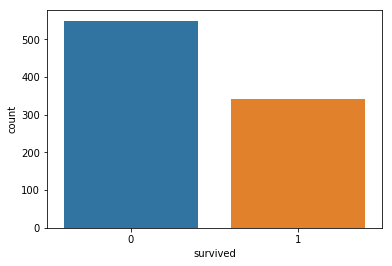

In [3]:
survival = sns.countplot(x='survived', data=titanic)

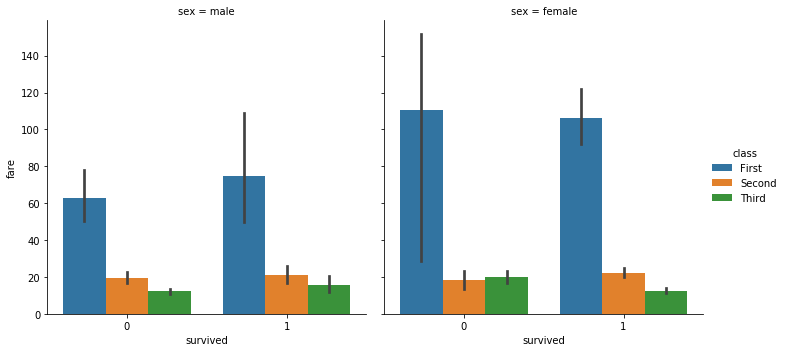

In [4]:
sns.catplot(x='survived', y='fare', hue='class',col='sex', data=titanic, kind='bar')

### Plot SibSp vs Survived per gender and Pclass using sns.catplot()

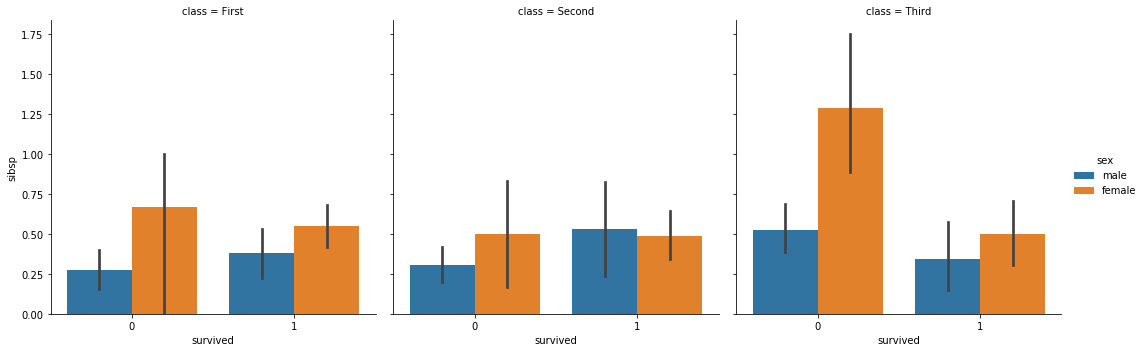

In [5]:
sns.catplot(x='survived', y='sibsp', hue='sex',col='class', data=titanic, kind='bar')

### Plot the distribution of fare for each Pclass, color by Survived, use sns.boxplot !

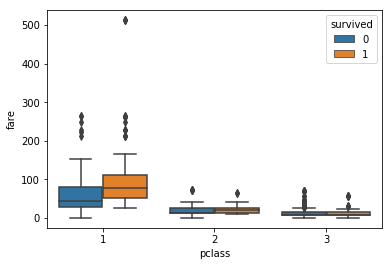

In [6]:
sns.boxplot(x='pclass', y='fare', data=titanic, hue='survived')

# Frequency table or contingency table

Pandas.crosstab()

pandas.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name='All', dropna=True, normalize=False)

Compute a simple cross-tabulation of two (or more) factors. By default computes a frequency table of the factors unless an array of values and an aggregation function are passed.

In [7]:
survived_class = pd.crosstab(index=titanic["survived"], 
                            columns=titanic["pclass"],
                             margins=True)

survived_class.columns = ["class1","class2","class3","rowtotal"]
survived_class.index= ["died","survived","coltotal"]

print(survived_class)

          class1  class2  class3  rowtotal
died          80      97     372       549
survived     136      87     119       342
coltotal     216     184     491       891


Any Series passed will have their name attributes used unless row or column names for the cross-tabulation are specified.

Any input passed containing Categorical data will have all of its categories included in the cross-tabulation, even if the actual data does not contain any instances of a particular category.

In the event that there aren’t overlapping indexes an empty DataFrame will be returned.

In [8]:
surv_sex_class = pd.crosstab(index=titanic["survived"], 
                             columns=[titanic["pclass"],
                                      titanic["sex"]],
                             margins=True)
print(surv_sex_class)

pclass        1           2           3       All
sex      female male female male female male     
survived                                         
0             3   77      6   91     72  300  549
1            91   45     70   17     72   47  342
All          94  122     76  108    144  347  891


### Plotting univariate distributions

The most convenient way to take a quick look at a univariate distribution in seaborn is the distplot() function. By default, this will draw a histogram and fit a kernel density estimate (KDE).

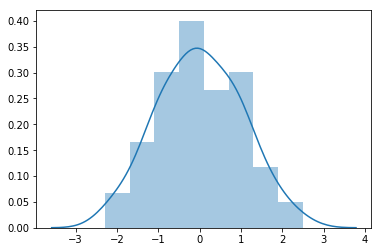

In [11]:
x = np.random.normal(size=100)
sns.distplot(x)

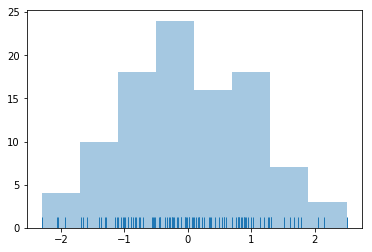

In [13]:
sns.distplot(x,kde=False, rug=True )

### Kernel density estimation

KDE can be a useful tool for plotting the shape of a distribution.

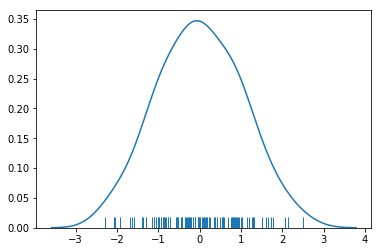

In [15]:
sns.distplot(x, hist=False, rug=True)

### Plotting bivariate distributions

The easiest way to plot bivariate distribution in seaborn is to just use the jointplot() function, which creates a multi-panel figure that shows both the bivariate (or joint) relationship between two variables along with the univariate (or marginal) distribution of each on separate axes.

In [16]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

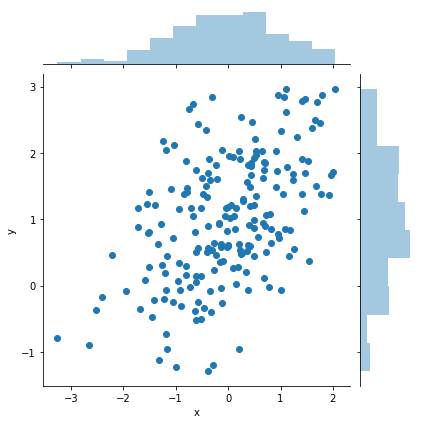

In [17]:
sns.jointplot(x='x', y='y', data=df)

# can also be drawn with plt.scatter function

Visualizing pairwise relationship in a dataset

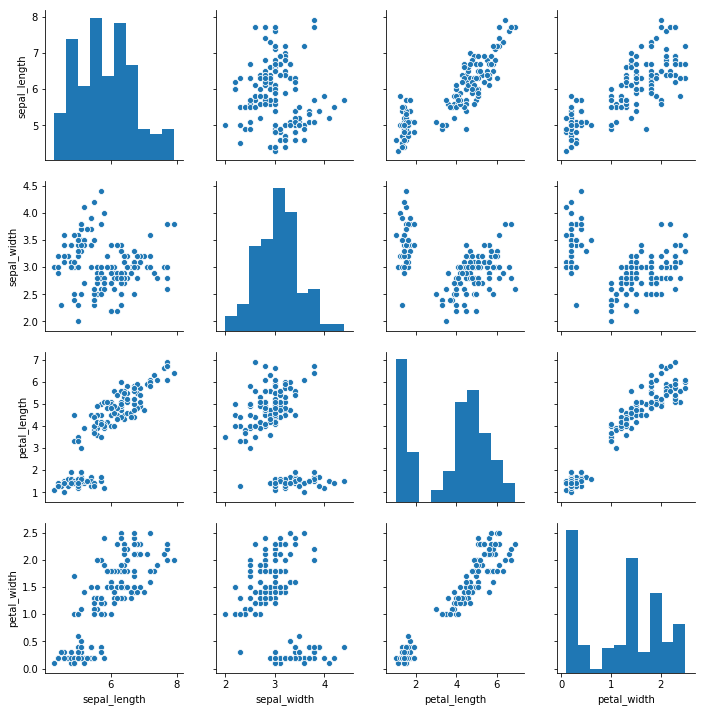

In [19]:
iris= sns.load_dataset('iris')

sns.pairplot(iris)